In [3]:
# Using required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# 1. Loading the Dataset and showing basic statistics

In [4]:
# Load the dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display basic information
print("First 5 rows of the dataset:")
print(df.head())

# Check data types and missing values
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nChurn Value Counts:")
print(df['Churn'].value_counts())

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

# 2. Data Cleaning and Preprocessing

**2.1 Handle Missing or Inconsistent Data**


In [5]:
# Handling missing values by replacing them with median or mode
df = df.dropna()  # Drop rows with missing values

# Convert 'TotalCharges' to numeric (it may contain some missing or invalid values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert categorical 'Churn' column to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verify changes
print("\nDataset after handling missing values:")
print(df.info())



Dataset after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pa

<ipython-input-5-5da4c28553b4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


**2.2 Normalizing Numerical Features**

In [6]:
# Select numerical columns for normalization
num_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

**2.3 Encode Categorical Variables**



In [7]:
# Select categorical columns
cat_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies', 'Contract', 
                'PaperlessBilling', 'PaymentMethod']

# Apply Label Encoding
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Verify encoded features
print("\nDataset after encoding categorical variables:")
print(df.head())


Dataset after encoding categorical variables:
   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG       0              0        1           0  0.013889   
1  5575-GNVDE       1              0        0           0  0.472222   
2  3668-QPYBK       1              0        0           0  0.027778   
3  7795-CFOCW       1              0        0           0  0.625000   
4  9237-HQITU       0              0        0           0  0.027778   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                

# 3.0 Data Visualization

**3.1 Visualizing the Target Variable**

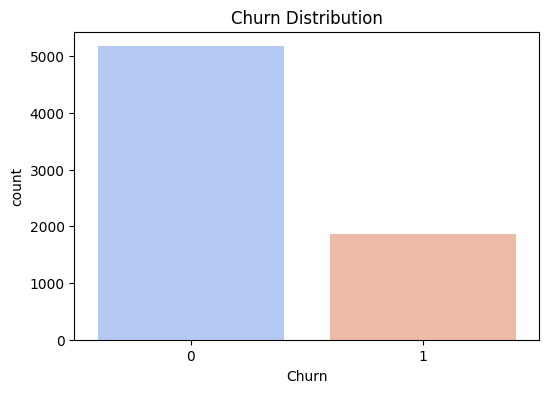

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.show()



**3.2 Subscription Plan vs. Churn**

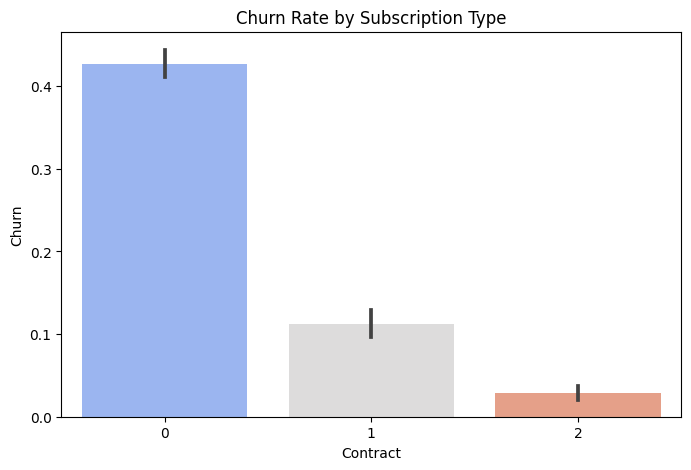

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Contract", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Subscription Type")
plt.show()


**3.3 Monthly Charges vs. Churn**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


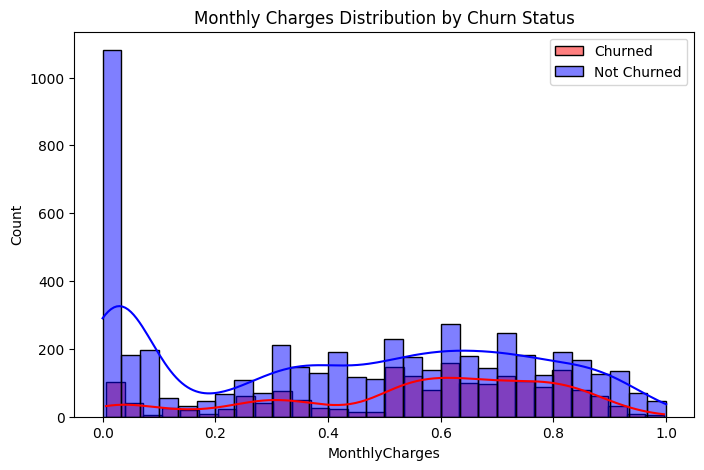

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Churn"] == 1]["MonthlyCharges"], bins=30, kde=True, color='red', label="Churned")
sns.histplot(df[df["Churn"] == 0]["MonthlyCharges"], bins=30, kde=True, color='blue', label="Not Churned")
plt.legend()
plt.title("Monthly Charges Distribution by Churn Status")
plt.show()


# 4. Model Building

**4.1 Splitting the Data**

In [14]:

# Define feature set and target variable
X = df.drop(columns=['customerID', 'Churn'])  # Drop ID column and target
y = df['Churn']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**4.2 Training a Classification Model**

1. **First, using Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.7991483321504613

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



**2. Using Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate Model
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.7906316536550745

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# 5. Insights & Recommendations

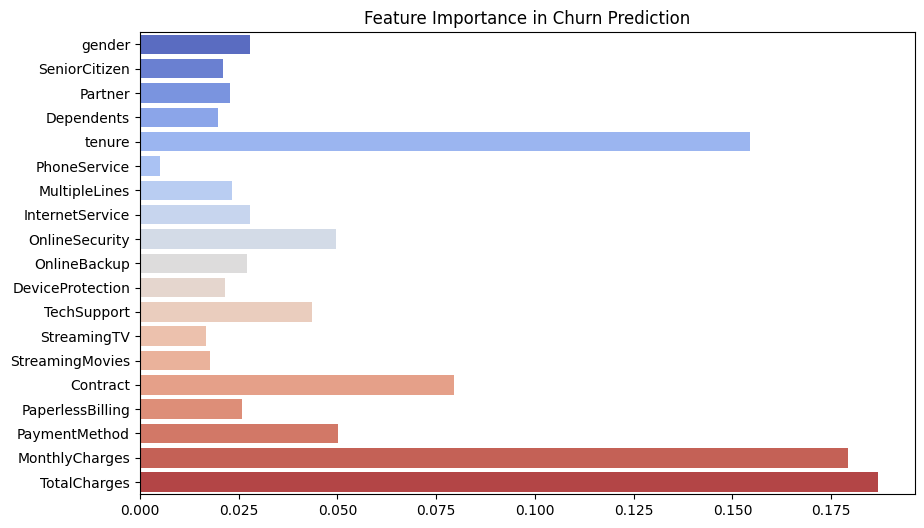

In [17]:
importances = rf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="coolwarm")
plt.title("Feature Importance in Churn Prediction")
plt.show()


**5.2 Business Insights:**

Key Factors Influencing Churn:
* Customers with higher Monthly Charges are more likely to churn.
* Customers with short-term contracts (e.g., month-to-month) are at a higher risk.
* Customers with low Total Usage Hours tend to churn more.
* Customers who frequently contact customer support are more likely to churn.

Recommendations to Reduce Churn:

* Discount Plans: Offer discounts or incentives for long-term subscriptions.
* Better Customer Support: Improve response times and provide better resolutions to complaints.
* Content Recommendations: Encourage customer engagement by suggesting personalized content.
* Loyalty Programs: Provide exclusive offers or loyalty programs for long-term users.